# COCO dataset -- Dowload and preparation

## 1. Download the dataset
### 1.1 Download and extract the annotation files
### 1.2 Selected the images of interest and the corresponding labels

## 2. Image preparation
...

In [1]:

from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from imutils import paths
import skimage.io as io
import numpy as np
import cv2
import os

from bodypose.dataset.download_coco import get_most_centered_keypoints
from bodypose.dataset.download_coco import select_imgs_with_persons
from bodypose.dataset.download_coco import download_imgs_and_labels
from bodypose.demo.graphics import draw_keypoints, draw_point
from config import KEYPOINT_DICT

## 1. Download the dataset

### 1.1 Download and extract the annotation files

In [2]:
annDir = "./dataset/coco/"
annFileURLs = ["http://images.cocodataset.org/annotations/annotations_trainval2014.zip",
                "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"]

if not os.path.isdir(annDir):
    os.makedirs(annDir)
    
def download_annotations(URL, force_download=False):
    
    download_ann = True
    fileName = URL.split(os.sep)[-1]
    dataType = fileName.split("_")[-1].split(".")[0][-4:]  
    zipPath = os.sep.join([".", fileName])
    dstPath = os.sep.join([annDir, "annotations"])
    
    print(f"[INFO]  Attempting to download {fileName}...")
    
    if os.path.isdir(dstPath):
        files = list(paths.list_files(annDir, contains=dataType))
        if files:
            download_ann = False
            print(f"[INFO] Annotations {dataType} already downloaded in {annDir}.")
    else: 
        os.makedirs(dstPath)
    
    if force_download:
        download_ann = True
        print("[INFO] Forcing download...")
        
    if download_ann:
        if not os.path.exists(zipPath):
            !wget $URL
        !unzip $zipPath 
        !mv  ./annotations/* $dstPath
        !rm -r ./annotations
        !rm $zipPath
    
    print(f"[INFO] Annotations downloaded at {dstPath}.")
        

for url in annFileURLs:
    download_annotations(url)

[INFO]  Attempting to download annotations_trainval2014.zip...
[INFO] Annotations 2014 already downloaded in ./dataset/coco/.
[INFO] Annotations downloaded at ./dataset/coco//annotations.
[INFO]  Attempting to download annotations_trainval2017.zip...
[INFO] Annotations 2017 already downloaded in ./dataset/coco/.
[INFO] Annotations downloaded at ./dataset/coco//annotations.


### 1.2 Selected the images of interest and the corresponding labels

We select only images containing persons. On those pics we apply the following rules: 
- Select  all keyPoints (visible and not visible) 
- Select the most centered person on the basis of the visible keyPoints 
- Check that the selected person is "big" enough inside the image size 
- Save the image and the corresponding keypoint 

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
[INFO] Found 2693 raw images...
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


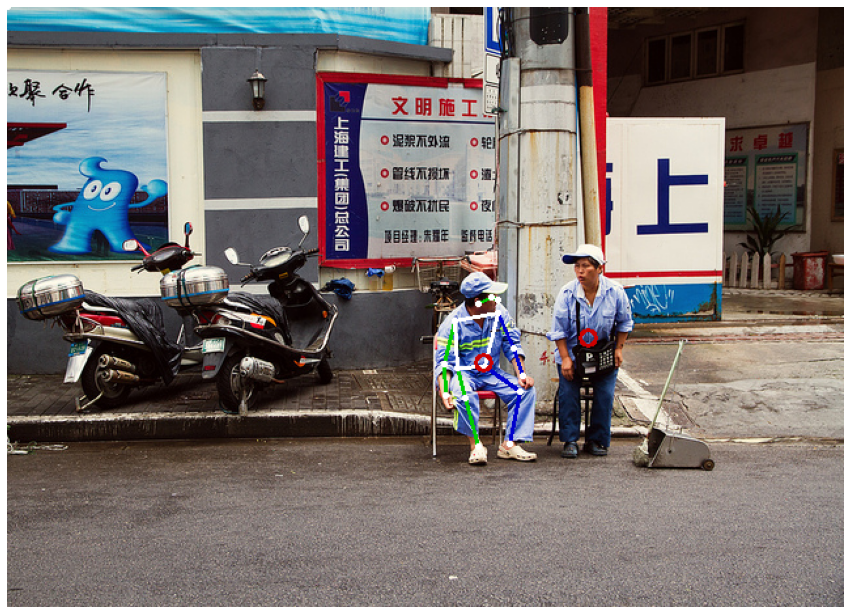

In [3]:
imgs, kps = select_imgs_with_persons("val2017", "./dataset/coco/")

i = 6

imgId, img_size = imgs[i]["id"], (imgs[i]["height"], imgs[i]["width"])
img_arr = io.imread(imgs[i]["coco_url"])
c_keypts, centers = get_most_centered_keypoints(kps, imgId, img_size)

with_kpts = draw_keypoints(img_arr, c_keypts, .5, KEYPOINT_DICT)
with_centers = draw_point(with_kpts, centers)

fig = plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(with_kpts)


In [11]:

for dataType in ["val2017", "val2014", "train2017", "train2014"]:
    
    print(f"*** {dataType.capitalize()} dataset ***")
    await download_imgs_and_labels(dataType, "dataset/coco/")
    print("\n\n")

*** Val2017 dataset ***
loading annotations into memory...
Done (t=2.69s)
creating index...
index created!
[INFO] Found 2693 raw images...
loading annotations into memory...
Done (t=0.30s)
creating index...
index created!
[INFO]  Processing image 2693/2693...


*** Val2014 dataset ***
loading annotations into memory...
Done (t=8.05s)
creating index...
index created!
[INFO] Found 21634 raw images...
loading annotations into memory...
Done (t=3.81s)
creating index...
index created!
[INFO]  Processing image 16646/21634...

##  2. Create TFRecords

In [5]:
from bodypose.dataset import  create_TFRcords
from imutils import paths
import numpy as np

In [6]:
outDir = "./dataset/tfrecords/coco/validation/"
if not os.path.isdir(outDir):
    os.makedirs(outDir)
else:
    !rm -r $(outDit)

imgPaths = list(paths.list_images("./dataset/coco/validation/"))
create_TFRcords(imgPaths = imgPaths, 
                outDir = outDir + "coco_val.tfrecords", 
                target_size = (416, 416),
                n_splits = 10)

/bin/bash: outDit: command not found
usage: rm [-f | -i] [-dIPRrvWx] file ...
       unlink [--] file
[INFO] Found 4610 files.
 Processing file 7/460.../10. 

2022-09-30 15:49:02.979307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Processing file 438/438...[INFO] Creating Dataset 10/10. INFO] Creating Dataset 4/10. 
